In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

print("Libraries imported successfully!")

C:\Users\Adwait\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Libraries imported successfully!


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 28s 2us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


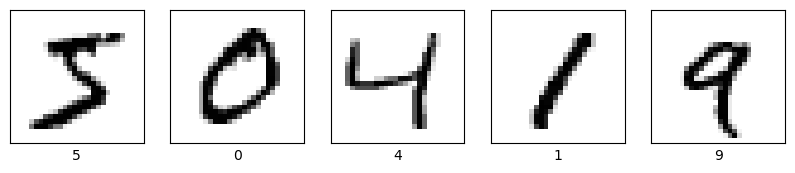

In [3]:
# Show the first 5 images
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [4]:
# Prepping for CNN: Reshape to (28, 28, 1)
x_train_cnn = x_train.reshape((60000, 28, 28, 1))
x_test_cnn = x_test.reshape((10000, 28, 28, 1))

# Prepping for Logistic Regression: Flatten the images
x_train_flat = x_train.reshape((60000, 784))
x_test_flat = x_test.reshape((10000, 784))

print("Data preparation complete!")

Data preparation complete!


In [5]:
print("Training Logistic Regression (this may take a minute)...")

# We use a 'saga' solver because it's faster for large datasets like MNIST
lr_model = LogisticRegression(solver='saga', tol=0.1)
lr_model.fit(x_train_flat, y_train)

print("Logistic Regression training complete!")

Training Logistic Regression (this may take a minute)...
Logistic Regression training complete!


In [6]:
# Build the CNN architecture
cnn_model = models.Sequential([
    # First Layer: Convolution detects features
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Layer: Narrowing down the features
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Layer: Flattening for the final decision
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 outputs for digits 0-9
])

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Training CNN...")
# We train for 5 epochs (5 full passes through the data)
history = cnn_model.fit(x_train_cnn, y_train, epochs=5, 
                    validation_data=(x_test_cnn, y_test))

print("CNN training complete!")

C:\Users\Adwait\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.9589 - loss: 0.1358 - val_accuracy: 0.9856 - val_loss: 0.0427
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9862 - loss: 0.0433 - val_accuracy: 0.9867 - val_loss: 0.0391
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9907 - loss: 0.0302 - val_accuracy: 0.9898 - val_loss: 0.0285
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9930 - loss: 0.0226 - val_accuracy: 0.9872 - val_loss: 0.0400
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9897 - val_loss: 0.0293
CNN training complete!


In [7]:
import joblib

# Save Logistic Regression (Standard format is .pkl)
joblib.dump(lr_model, '../models/logistic_reg_model.pkl')

# Save CNN (Standard format is .h5)
cnn_model.save('../models/cnn_digit_model.h5')

print("Models saved successfully in the /models folder!")

Models saved successfully in the /models folder!


In [8]:
# Predictions for Logistic Regression
lr_preds = lr_model.predict(x_test_flat)

# Predictions for CNN (returns probabilities, so we take the highest one)
cnn_probs = cnn_model.predict(x_test_cnn)
cnn_preds = np.argmax(cnn_probs, axis=1)

print("Predictions complete.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predictions complete.


In [12]:
import os

# Create the outputs folder if it doesn't exist
output_path = '../outputs'
if not os.path.exists(output_path):
    os.makedirs(output_path)
    print("✅ Created missing 'outputs' directory!")
else:
    print("✅ 'outputs' directory already exists.")

✅ Created missing 'outputs' directory!


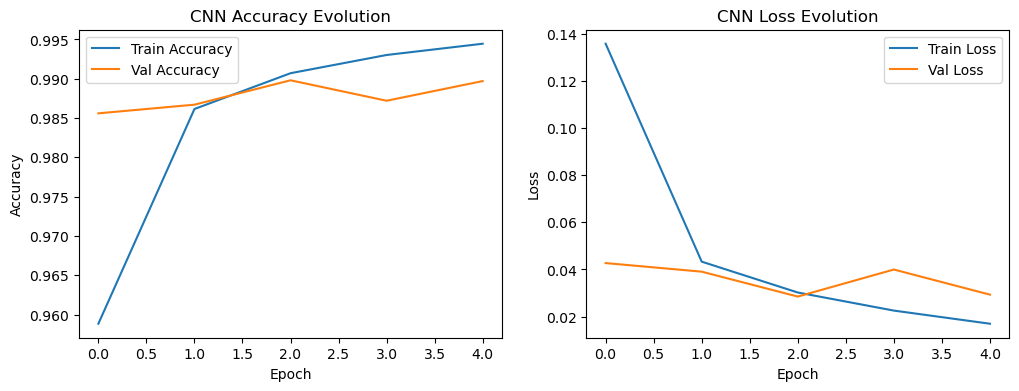

In [13]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('CNN Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig('../outputs/cnn_training_graphs.png')
plt.show()




In [14]:
import cv2

# Take the first image from the test set
# MNIST images are 0-1 (float), OpenCV usually works with 0-255 (uint8)
sample_img = (x_test[0] * 255).astype(np.uint8)

# Save the original for comparison
cv2.imwrite('../outputs/original_digit.png', sample_img)

print("Sample image prepared for OpenCV tasks.")

Sample image prepared for OpenCV tasks.


In [15]:
# 1. Canny Edge Detection
edges = cv2.Canny(sample_img, 100, 200)

# 2. Image Thresholding (Binary)
# Anything above 127 becomes white (255), everything else black (0)
_, thresh = cv2.threshold(sample_img, 127, 255, cv2.THRESH_BINARY)

# Save results
cv2.imwrite('../outputs/canny_edges.png', edges)
cv2.imwrite('../outputs/thresholded.png', thresh)

print("Edge detection and Thresholding complete.")

Edge detection and Thresholding complete.


In [16]:
# 1. Flip (Horizontal)
flipped = cv2.flip(sample_img, 1)

# 2. Rotate (90 degrees clockwise)
rotated = cv2.rotate(sample_img, cv2.ROTATE_90_CLOCKWISE)

# 3. Brightness Adjustment
# We add 50 to every pixel (clipping at 255)
bright = cv2.convertScaleAbs(sample_img, alpha=1, beta=50)

# Save results
cv2.imwrite('../outputs/aug_flipped.png', flipped)
cv2.imwrite('../outputs/aug_rotated.png', rotated)
cv2.imwrite('../outputs/aug_brightened.png', bright)

print("Augmentation tasks complete.")

Augmentation tasks complete.


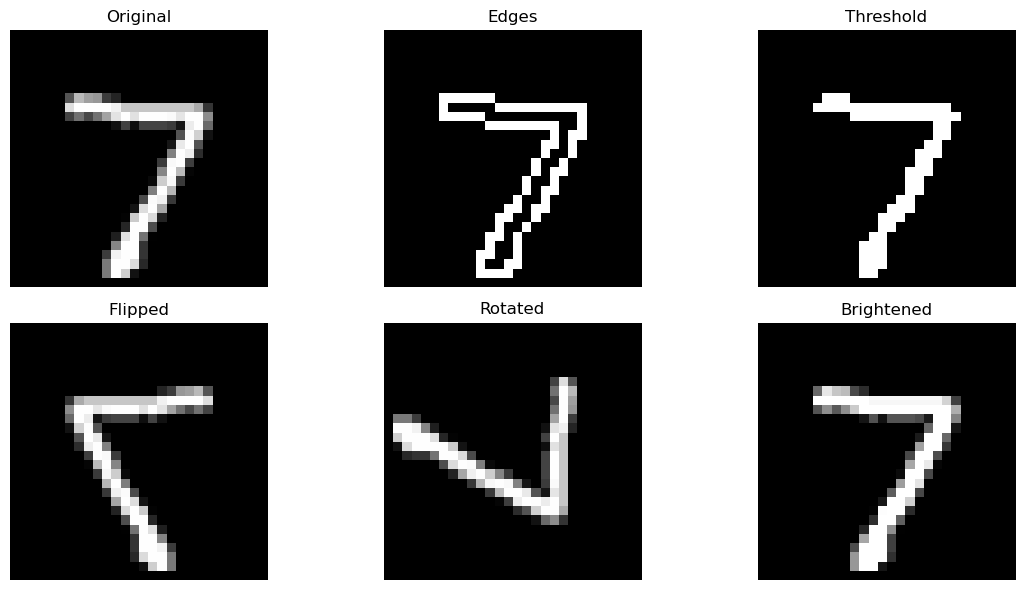

In [17]:
titles = ['Original', 'Edges', 'Threshold', 'Flipped', 'Rotated', 'Brightened']
images = [sample_img, edges, thresh, flipped, rotated, bright]

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()